In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as pit
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## loading dataset file and check dataframe

In [3]:
import pandas as pd

In [4]:
df_RCOCT=pd.read_csv("/content/RentalCarOfContractType.csv")
df_RCOCT[100:104]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
100,66437196,렌탈,Promotion,서비스 방문,2019-10-21,60,CMS,K3,90900,계약확정,0,없음,2.0,농협은행,정상,29.0,1259.0
101,66420849,렌탈,Promotion,서비스 방문,2019-10-21,60,CMS,K2,90900,계약확정,0,없음,3.0,외환은행,정상,NaN,NaN
102,66758580,렌탈,Package,서비스 방문,2019-10-21,60,CMS,K1,134700,계약확정,0,없음,2.0,국민은행,정상,57.0,2262.0
103,66282355,렌탈,Extension_Rental,서비스 방문,2019-10-21,60,CMS,K1,96900,계약확정,0,없음,1.0,우리은행,정상,61.0,2497.0


In [5]:
df_RCOCT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [6]:
import seaborn as sns

## 단일 변수 시각화

## 수치형
- 히스토그램
- boxplot : IQR(4분위 표시)

In [7]:
df_RCOCT.describe()

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


<Axes: xlabel='age', ylabel='Count'>

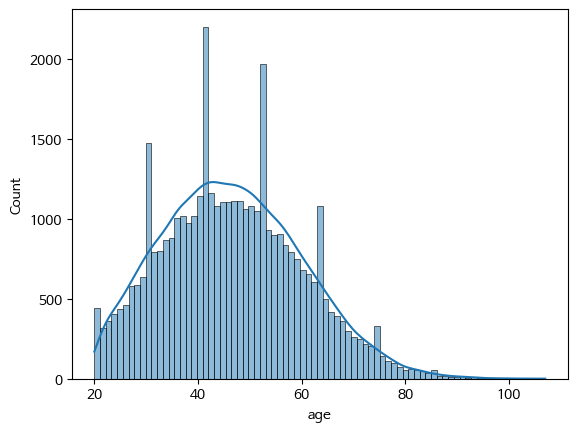

In [8]:
sns.histplot(data=df_RCOCT,x='age',kde=True)

<Axes: xlabel='age'>

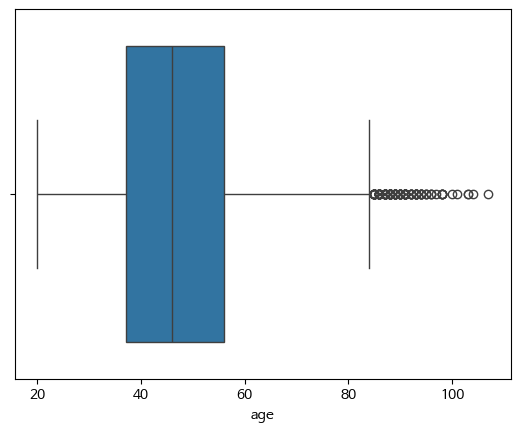

In [9]:
# 위 chart에서 80세 이상인 데이터 의심
sns.boxplot(data=df_RCOCT,x='age')

## 범주형

In [10]:
df_RCOCT.describe(include="object")

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


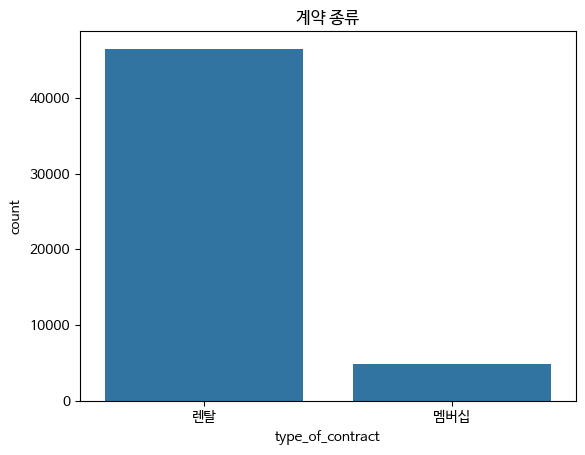

In [11]:
sns.countplot(data=df_RCOCT, x="type_of_contract")
pit.title("계약 종류")
pit.show()

<Axes: xlabel='type_of_contract2', ylabel='count'>

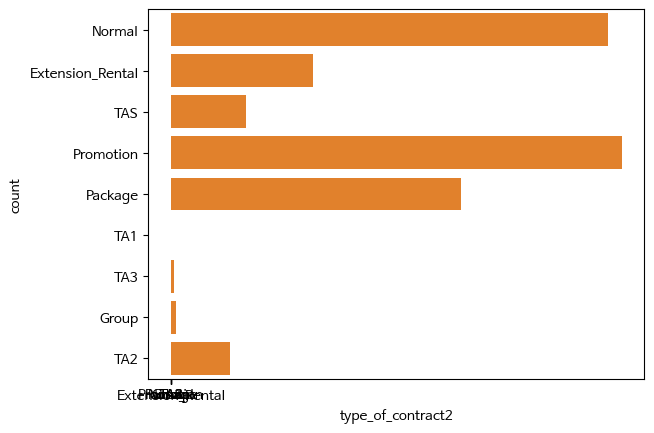

In [12]:
sns.countplot(data=df_RCOCT,x='type_of_contract2')
sns.countplot(data=df_RCOCT,y='type_of_contract2')

In [17]:
df_RCOCT['bank'].value_counts()

국민은행         9901
롯데카드         9518
농협은행         6278
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1533
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          888
삼성카드          884
현대카드          876
대구은행          746
우체국           717
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
NH농협카드          4
한국투자증권          4
신한금융투자          4
우리카드            3
대우증권            2
하이투자증권          1
메리츠종합금융증권       1
수협카드            1
상호저축은행          1
SK증권            1
하나대투증권          1
산림조합중앙회         1
대신증권            1
씨티카드            1
Name: bank, dtype: int64

<Axes: xlabel='count', ylabel='bank'>

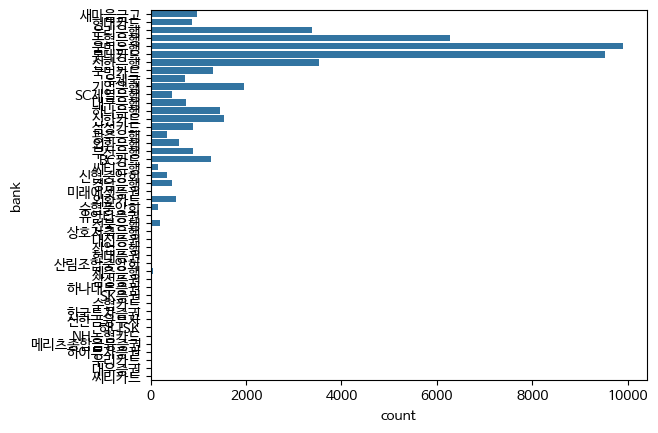

In [22]:
sns.countplot(data=df_RCOCT,y = 'bank')

In [30]:
series_bank = df_RCOCT['bank'].value_counts()
# series_bank.iloc[:10].index.to_list()
bank_list = series_bank.iloc[:10].index.to_list()

<Axes: xlabel='count', ylabel='bank'>

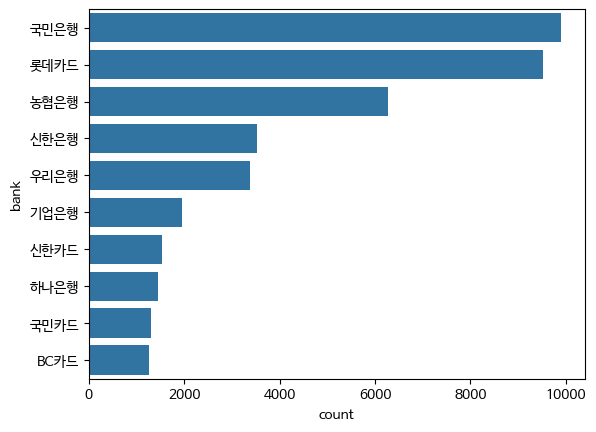

In [31]:
# sns.countplot(data=df_RCOCT,y='bank',order=['국민은행','농협은행','국민카드'])
sns.countplot(data=df_RCOCT,y='bank',order=bank_list)

## 다변수 시각화

<Axes: xlabel='type_of_contract2', ylabel='count'>

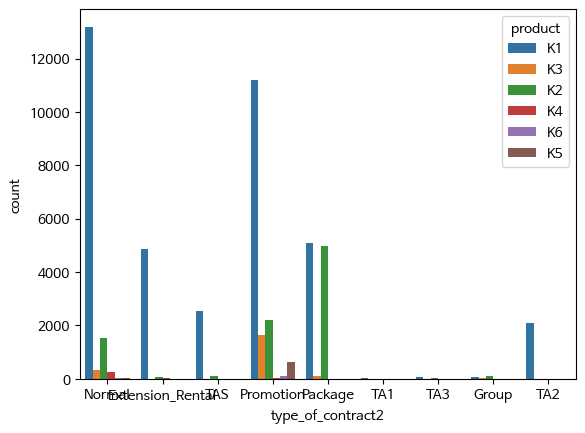

In [13]:
sns.countplot(data=df_RCOCT,x='type_of_contract2',hue='product')